<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/01.%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 퍼셉트론이란?
* 입력된 다수의 데이터에 대해 어떠한 처리( 가중치 $w$ )를 곱해서 출력 하나($y$)를 내는 것

$$
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$$

---> **반응 조건 계산식**

퍼셉트론을 시각화하면?

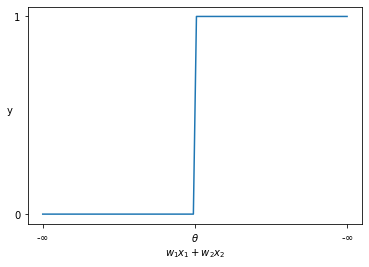

In [ ]:
# func : 퍼셉트론
def func(x1, x2):
  # 임의의 가중치인 w1, w2를 지정
  # 임의의 임계값인 theta를 지정
  w1, w2, theta = 0.5, 0.5, 2
  y = w1*x1 + w2*x2

  return y, y >= theta

# 입력 데이터 생성
x1 = np.linspace(-3, 7, 100)
x2 = np.linspace(-3, 7, 100)

# 퍼셉트론의 결과물 구하기
y_value, y_result = func(x1, x2)

# 시각화
plt.plot(y_value, y_result)
plt.yticks([0, 1])
plt.xticks([-3,2,7], [r'-$\infty$', r'$\theta$', r'-$\infty$'])
plt.xlabel(r"$w_1x_1+w_2x_2$")
plt.ylabel("y", rotation=0)
plt.show()

# AND 게이트 구현하기

* 입력값 $x_1$, $x_2$가 둘 다 1 일 때만 결과물 $y$가 1

In [ ]:
def AND(x1, x2):
  # x1, x2에 대해서 조건 검사(if)를 하는 것은 퍼셉트론이 아니다.
  # w1x1 + w2x2 > theta 인지만 검사
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2

    if tmp > theta:
        return 1
    else:
        return 0

In [ ]:
AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

x, w가 둘 다 1일 때만 결과값 1 출력됨

## AND 게이트 일반화 버전 구현하기

$\theta$를 기준으로 $w_1x_1 + w_2x_2$의 결과가 0 또는 1로 결정지어 진다. 이걸 함수로 일반화

---> 어떤 $\theta$ 가 들어오든 상관없이 하나의 **반응 조건 계산식**으로 대응할 수 있도록 함수 구현하기

* 원래 수식

 * $
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$

* 바뀐 수식

 * $
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    z = w1*x1 + w2*x2 - theta

    return int(z > 0)   # 1 또는 0으로 출력하기 위해 int 넣어줌

AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

### 단위 계단 함수
* $
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$

    ---> '$-\theta$' 를 '$b$' 로 변경한다.

* $
y = \begin{cases} 
0 \enspace (w_1x_1 + w_2x_2 +b \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 +b > 0) \end{cases}
$

* $
z = w_1x_1 + w_2x_2 +b
$

* $
y = \begin{cases} 
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$

* $
u(z) = \begin{cases} 
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$

* $y=u(z)$
* 함수 $u$ : **단위 계단 함수** (그래프가 계단 모양이기 때문)

    --> 결과물이 0과 1로만 출력됨

여러 개의 입력이 있다고 가정한다면?


In [ ]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7  # theta 값이 0.7이기 때문에 (b = -theta)

# z = w1*x2 + w2*x2 + b
print(w*x)
print(np.sum(w*x)) # w*x들의 합
print(np.sum(w*x) + b)
print(np.sum(w*x) + b > 0)
print(int(np.sum(w*x) + b > 0)) # z<0 이기 때문에 결과물 0(음성 클래스)

[0.  0.5]
0.5
-0.19999999999999996
False
0


In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7

    z = np.sum(x*w) + b

    return int(z > 0)

AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1)

(0, 0, 0, 1)

### 가중치와 편향에 대한 의미
* 가중치 : 입력값에 대한 중요도
  * 입력된 데이터에 대해 결과물이 1로 가거나, 0으로 갈 수 있도록 입력값을 조절하는 변수
* 편향 : 퍼셉트론이 얼마나 **쉽게 활성화가 되는가**를 결정
  * 활성화 : 퍼셉트론의 결과물이 1이 되는것, $z$가 0을 넘어가는 것
  * **편향이 크면** 입력 데이터나 가중치가 아무리 작아도 **쉽게 활성화** 됨
    * 흥분도가 큰 퍼셉트론 - 민감한 퍼셉트론
  * **편향이 작으면** 입력 데이터나 가중치가 아무리 커도 쉽게 **활성화가 되지 않음**
    * 흥분도가 낮은 퍼셉트론 - 둔감한 퍼셉트론

# NAND 게이트 구현하기

* AND 게이트의 모든 부호를 거꾸로

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])

    # 가중치와 편향의 부호를 AND와 반대로
    w = np.array([-0.5, -0.5])
    b = 0.7  # = theta

    z = np.sum(w*x) + b

    return int(z>0)

NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1)

(1, 1, 1, 0)

결과값 AND게이트의 정반대로 출력됨

# OR 게이트 구현하기

AND게이트의 매개변수(b)를 적절히 조절해 주기  
---> **임계값** 조절

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2

    z = np.sum(w*x) + b

    return int(z>0)

OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1)

(0, 1, 1, 1)

# XOR 구현하기 - **다층 퍼셉트론**

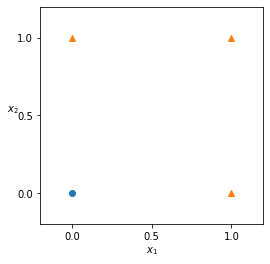

In [ ]:
# OR 퍼셉트론에 대한 시각화

plt.figure(figsize=(4,4))

plt.scatter([0],[0], marker='o')
plt.scatter([1,0,1],[0,1,1], marker='^')
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.xlim((-0.2,1.2))
plt.ylim((-0.2,1.2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$', rotation=0)

plt.show()

OR 퍼셉트론의 경우 하나의 직선으로 0과 1이 되는 조건을 만족할 수 있음

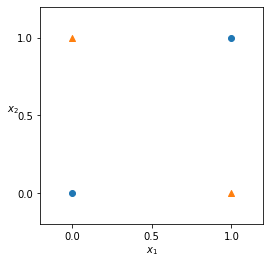

In [ ]:
# XOR 게이트 시각화
plt.figure(figsize=(4,4))

plt.scatter([0,1],[0,1], marker='o')
plt.scatter([1,0],[0,1], marker='^')
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.xlim((-0.2,1.2))
plt.ylim((-0.2,1.2))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$', rotation=0)

plt.show()

XOR 퍼셉트론의 경우 곡선(비선형) 이나 여러 개의 직선(선형)을 쌓아서 해결해야 함  

----> 이를 **다층 퍼셉트론** 이라고 함

In [ ]:
# XOR 구현하기
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)

    # NAND와 OR의 결과물인 s1, s2를 AND 게이트의 입력값으로 사용하면 XOR의 결과물이 됨
    y = AND(s1, s2)

    return y

NAND(0,0), NAND(1,0), NAND(0,1), NAND(1,1)

(1, 1, 1, 0)

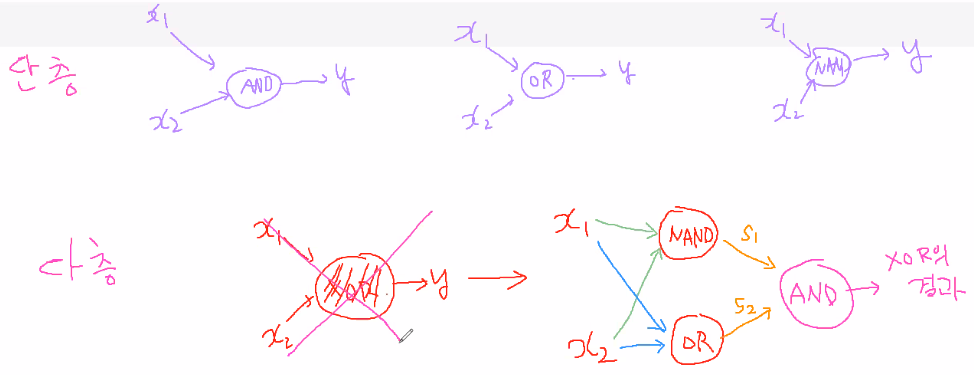